In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from numpy.random import seed
from pandas import read_csv, DataFrame
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Activation
from keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from keras import *
import keras
print( keras.__version__)
from keras import backend as K
K.set_image_data_format('channels_last')
##K.set_image_dim_ordering('tf')
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from keras.metrics import binary_accuracy
from keras.metrics import categorical_accuracy

keras.backend.backend()
##keras.backend.image_dim_ordering()

3.5.0


'tensorflow'

In [23]:
#demo for planes
img_width, img_height = 200, 200


train_data_dir      = '/content/drive/MyDrive/Colab Notebooks/data/Train'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/Valid'

batch_size = 2



In [24]:
import time
start = time.time()

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape)) #(3,227, 227)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

end = time.time()
print(end - start)

0.26896119117736816


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#batch_size = 10
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 940 images belonging to 1 classes.
Found 63 images belonging to 1 classes.


In [27]:
import time
start = time.time()

model.fit(train_generator,
                        steps_per_epoch=100,
                        epochs=100,
                        validation_data=validation_generator)

end = time.time()
print(end - start)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.9743 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 1.9153e-33
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 1.0000 - loss: 3.4629e-18 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 1.0000 - loss: 9.6371e-19 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 1.0000 - loss: 2.8504e-15 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 5/100
 70/100 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 1.0000 - loss: 4.8677e-15

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 1.0000 - loss: 4.3040e-15 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 1.0000 - loss: 6.1100e-14 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 1.0000 - loss: 3.6812e-18 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 1.0000 - loss: 2.6663e-23 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 1.0000 - loss: 5.8505e-21 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 1.0000 - loss: 2.7308e-17 - val_accuracy: 1.0000 - val_loss: 1.8986e-33
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 1.0000 - loss: 9.0251e-11 - val_accuracy: 1.0000 - val_loss: 1.8971e-33
Epoch 12/100
100/100 ━━━━━━━━━

In [38]:
from skimage.io import imread
from skimage.transform import resize
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

import cv2
import numpy as np

import time
start = time.time()

#img = imread('/content/drive/My Drive/28th_April_2021_GA_DL_GL/GL-Dataset/AD_GL_Test/0-Sq.png')

 #make sure that path_to_file contains the path to the image you want to predict on.
img = imread('/content/drive/MyDrive/Colab Notebooks/data/Train/Train/dogs/n02085620_13964.jpg')
img = resize(img,(200,200))
#img = load_img(img, target_size=(227, 227))
#print('PIL image size',img.size)
plt.imshow(img)
plt.show()

test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/Train/Train/wolves/190607_wolves_full.jpg')
 test_img = test_img.reshape(1,200,200,3)


# Check if the image is loaded properly
if test_img is None:
    raise ValueError("Image not found. Check the file path.")

Y = model.predict(test_img)[0]
print(Y)

#val = np.argmax(Y)
if(Y >= 0.5):
    print("Wolf")
else:
    print("Dog")

end = time.time()
print(end - start)

IndentationError: unexpected indent (<ipython-input-38-58aa5ba9099e>, line 25)

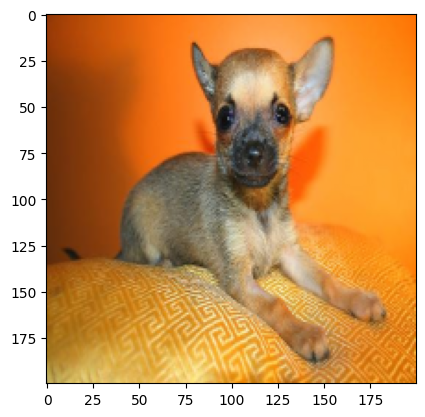

ValueError: cannot reshape array of size 5961600 into shape (1,200,200,3)

In [41]:
from skimage.io import imread
from skimage.transform import resize
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

import cv2
import numpy as np

import time
start = time.time()

#img = imread('/content/drive/My Drive/28th_April_2021_GA_DL_GL/GL-Dataset/AD_GL_Test/0-Sq.png')

 #make sure that path_to_file contains the path to the image you want to predict on.
img = imread('/content/drive/MyDrive/Colab Notebooks/data/Train/Train/dogs/n02085620_4207.jpg')
img = resize(img,(200,200))
#img = load_img(img, target_size=(227, 227))
#print('PIL image size',img.size)
plt.imshow(img)
plt.show()

test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/Train/Train/wolves/Gray-timber-wolf.jpg')
test_img = test_img.reshape(1,200,200,3)

Y = model.predict(test_img)[0]
print(Y)

#val = np.argmax(Y)
if(Y >= 0.5):
    print("Wolf")
else:
    print("Dog")

end = time.time()
print(end - start)

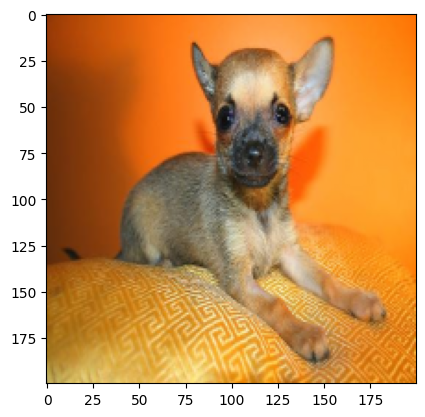

Original image shape: (1242, 1600, 3)
Resized image shape: (200, 200, 3)
Reshaped image shape: (1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction result: [0.]
Dog
Time taken: 0.6106271743774414


In [43]:
import cv2
import numpy as np
import time

start = time.time()

# Load the image using OpenCV
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/Train/Train/wolves/Gray-timber-wolf.jpg')


plt.imshow(img)
plt.show()

# Check the shape of the original image
print("Original image shape:", test_img.shape)

# Resize the image to 200x200 (resize to ensure it fits the expected input shape)
test_img_resized = cv2.resize(test_img, (200, 200))
print("Resized image shape:", test_img_resized.shape)

# Normalize the image (optional, depending on your model)
test_img_resized = test_img_resized / 255.0  # Normalize to [0, 1]

# Reshape the image to include the batch size (add batch dimension)
test_img_resized = test_img_resized.reshape(1, 200, 200, 3)

# Print the reshaped image shape
print("Reshaped image shape:", test_img_resized.shape)

# Make the prediction
Y = model.predict(test_img_resized)[0]
print("Prediction result:", Y)

# Make decision based on the prediction
if Y >= 0.5:
    print("Wolf")
else:
    print("Dog")

end = time.time()
print("Time taken:", end - start)
